In [82]:
import os
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [84]:
salary_table = pd.read_csv("NBA_season1718_salary.csv",encoding = 'utf-8') 
seasons = pd.read_csv("Seasons_Stats.csv",encoding = 'utf-8')  

In [85]:
salary_table = salary_table[['Player','season17_18']]
salary_table.rename(columns={'season17_18':'salary17_18'},inplace = True) #variable rename
salary_table['salary17_18'] = salary_table['salary17_18']/1000000 #transform salary to 'million'

seasons = seasons[seasons['Year']>=2017] 
stats17 = seasons[['Year','Player','Pos','Age','G','PER',
                   'MP','PTS','AST','TRB','TOV','BLK','STL']]

stats17.drop_duplicates(subset=['Player'], keep='first',inplace=True) #drop duplicate data

c = ['MPG','PPG','APG','RPG','TOPG','BPG','SPG']
w = ['MP','PTS','AST','TRB','TOV','BLK','STL'] 

for i,s in zip(c,w):
    stats17[i] = stats17[s] / stats17['G']

stats17.drop(w,axis=1,inplace=True)
#stats17.drop(['G'],axis=1,inplace=True)
stats17.loc[stats17['Pos'] == 'PF-C','Pos'] = 'PF'
stats_salary = pd.merge(stats17, salary_table) 

In [86]:
stats_salary.columns

Index(['Year', 'Player', 'Pos', 'Age', 'G', 'PER', 'MPG', 'PPG', 'APG', 'RPG',
       'TOPG', 'BPG', 'SPG', 'salary17_18'],
      dtype='object')

In [87]:
stats_salary.drop_duplicates(subset=['Player'],keep='first',inplace=True)
stats_salary.sort_values(by='PPG',ascending=False,inplace = True)
stats_salary[['Player','PPG']].head(10)

,Player,PPG
418,Russell Westbrook,31.580247
164,James Harden,29.086420
384,Isaiah Thomas,28.934211
97,Anthony Davis,27.986667
105,DeMar DeRozan,27.297297
248,Damian Lillard,26.986667
86,DeMarcus Cousins,26.972222
204,LeBron James,26.405405
241,Kawhi Leonard,25.513514
95,Stephen Curry,25.303797


In [88]:
stats_salary.sort_values(by='PER',ascending = False,inplace = True)
stats_salary[['Player','PER']].head(10)

,Player,PER
200,Demetrius Jackson,30.8
418,Russell Westbrook,30.6
261,Boban Marjanovic,29.6
114,Kevin Durant,27.6
97,Anthony Davis,27.5
241,Kawhi Leonard,27.5
164,James Harden,27.3
204,LeBron James,27.0
384,Isaiah Thomas,26.5
218,Nikola Jokic,26.4


In [89]:
stats_salary.sort_values(by='Age',ascending = False,inplace = True)
stats_salary[['Player','Age']].head(10)

,Player,Age
70,Vince Carter,40.0
147,Manu Ginobili,39.0
383,Jason Terry,39.0
325,Paul Pierce,39.0
303,Dirk Nowitzki,38.0
172,Udonis Haslem,36.0
112,Mike Dunleavy,36.0
89,Jamal Crawford,36.0
206,Richard Jefferson,36.0
26,Matt Barnes,36.0


In [90]:
stats_salary.sort_values(by='TOPG',ascending=False,inplace = True)
stats_salary[['Player','TOPG']].head(10)

,Player,TOPG
164,James Harden,5.728395
418,Russell Westbrook,5.407407
410,John Wall,4.141026
204,LeBron James,4.094595
121,Joel Embiid,3.774194
86,DeMarcus Cousins,3.736111
44,Eric Bledsoe,3.378788
359,Dennis Schroder,3.265823
49,Devin Booker,3.089744
95,Stephen Curry,3.025316


In [91]:
sns.set_style("white")

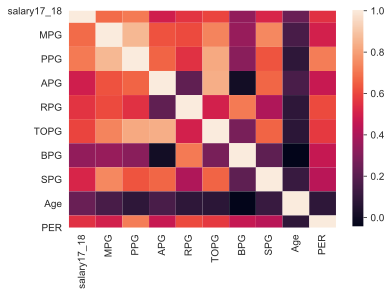

In [92]:
heat_salary= stats_salary[['salary17_18','Pos','MPG','PPG','APG','RPG','TOPG',
                           'BPG','SPG','Age','PER']]
dfData = heat_salary.corr() 
sns.heatmap(dfData)

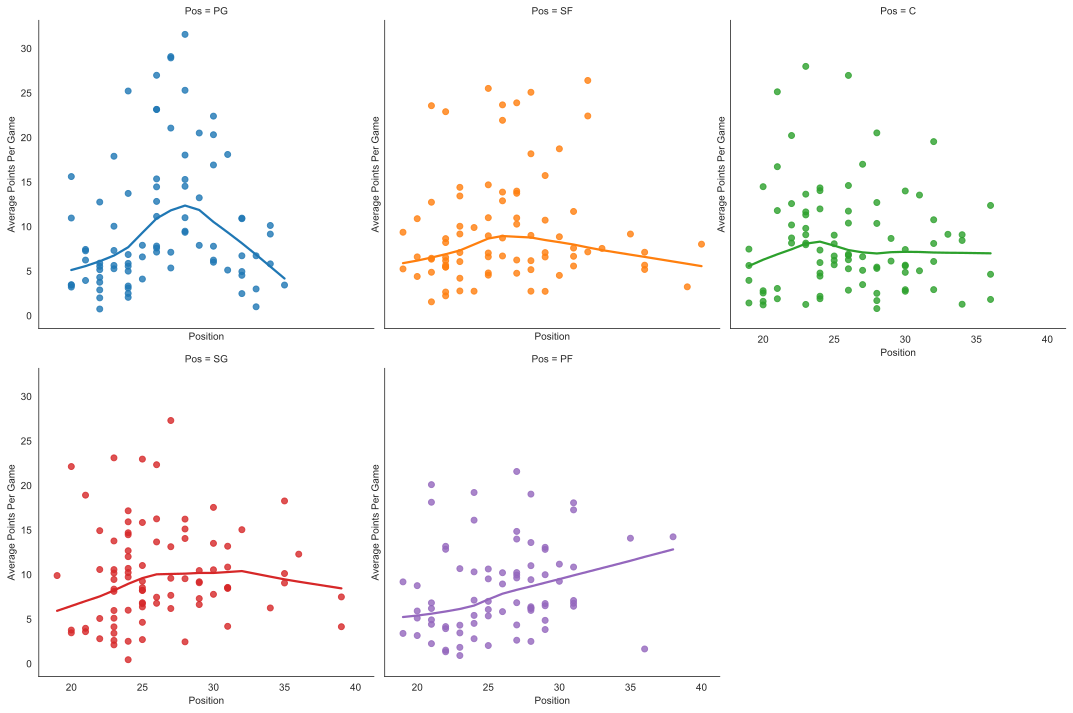

In [93]:
sns.lmplot(x="Age", y="PPG",hue="Pos",col="Pos",col_wrap=3, 
           data=stats_salary,lowess=True).set(
    xlabel='Position', 
    ylabel='Average Points Per Game')

[Text(0, 0.5, 'Average Turnovers Per Game'), Text(0.5, 0, 'Position')]

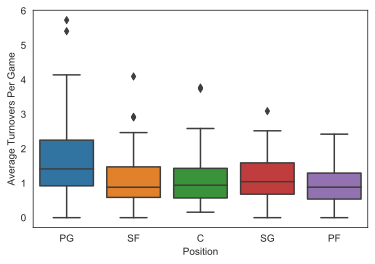

In [94]:
sns.boxplot(x="Pos", y="TOPG", data=stats_salary).set(
    xlabel='Position', 
    ylabel='Average Turnovers Per Game')

[Text(0, 0.5, 'Average Blocks Per Game'), Text(0.5, 0, 'Position')]

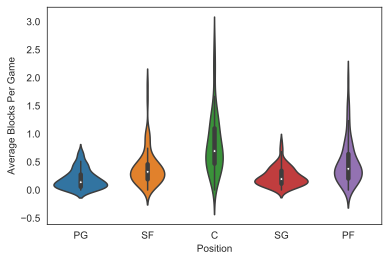

In [95]:
sns.violinplot(x="Pos", y="BPG", data=stats_salary).set(
    xlabel='Position', 
    ylabel='Average Blocks Per Game')

In [96]:
 from sklearn.preprocessing import Normalizer

In [97]:
#from mpl_toolkits.mplot3d import Axes3D
#sns.pairplot(heat_salary)

In [98]:
%config InlineBackend.figure_format = 'png'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2089f5d0>,
      dtype=object)

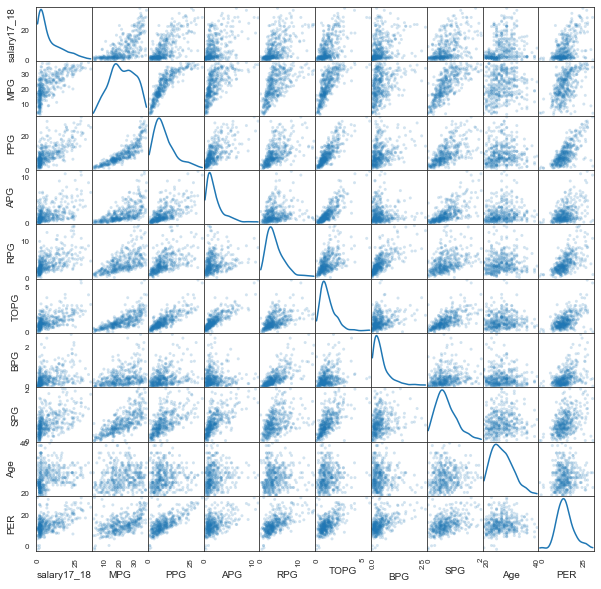

In [99]:
from pandas.plotting import scatter_matrix
#scatter_matrix(heat_salary)
scatter_matrix(heat_salary, alpha=0.2, figsize=(10,10), diagonal='kde')

In [100]:
%config InlineBackend.figure_format = 'svg'

In [101]:
salary_table['salary17_18'].describe()

count    573.000000
mean       5.858946
std        7.162373
min        0.017224
25%        1.312611
50%        2.386864
75%        7.936509
max       34.682550
Name: salary17_18, dtype: float64

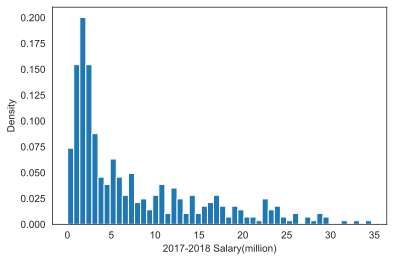

In [102]:
plt.hist(stats_salary['salary17_18'],density=True,bins=50)
plt.xlabel('2017-2018 Salary(million)')
plt.ylabel('Density')
plt.show()

In [103]:
# to convert categorical feature to dummy. make new dummies into name_value.
# it will automatic delete a value group as reference, which default to be biggest group.
def convert_dummy(df, feature,rank=0): 
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [104]:
stats_salary = convert_dummy(stats_salary,'Pos')

In [270]:
#from sklearn.externals.six import StringIO
#import pydotplus
#import graphviz
#from IPython.display import Image  
#import os 

stats_salary = stats_salary.dropna()
Y = stats_salary['salary17_18']
X = stats_salary.drop(['salary17_18','Year', 'Player'],axis=1)

In [271]:
X.columns

Index(['Age', 'G', 'PER', 'MPG', 'PPG', 'APG', 'RPG', 'TOPG', 'BPG', 'SPG',
       'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG'],
      dtype='object')

In [272]:
# Now let us rescale our data
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
transformer = MaxAbsScaler().fit(X) # Scale each feature by its maximum absolute value.
newX = transformer.transform(X)
newX = pd.DataFrame(newX,columns = X.columns)

In [273]:
X.head()

,Age,G,PER,MPG,PPG,APG,RPG,TOPG,BPG,SPG,Pos_PF,Pos_PG,Pos_SF,Pos_SG
164,27.0,81.0,27.3,36.382716,29.086420,11.185185,8.135802,5.728395,0.456790,1.481481,0,1,0,0
418,28.0,81.0,30.6,34.592593,31.580247,10.370370,10.666667,5.407407,0.382716,1.641975,0,1,0,0
410,26.0,78.0,23.2,36.358974,23.141026,10.653846,4.179487,4.141026,0.628205,2.012821,0,1,0,0
204,32.0,74.0,27.0,37.756757,26.405405,8.729730,8.648649,4.094595,0.594595,1.243243,0,0,1,0
121,22.0,31.0,24.1,25.354839,20.225806,2.129032,7.838710,3.774194,2.451613,0.870968,0,0,0,0


In [274]:
newX.head() # transformed data

,Age,G,PER,MPG,PPG,APG,RPG,TOPG,BPG,SPG,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,0.675,0.987805,0.886364,0.963608,0.921032,1.000000,0.575787,1.000000,0.172897,0.731121,0.0,1.0,0.0,0.0
1,0.700,0.987805,0.993506,0.916196,1.000000,0.927152,0.754902,0.943966,0.144860,0.810325,0.0,1.0,0.0,0.0
2,0.650,0.951220,0.753247,0.962979,0.732769,0.952496,0.295791,0.722895,0.237779,0.993340,0.0,1.0,0.0,0.0
3,0.800,0.902439,0.876623,1.000000,0.836137,0.780473,0.612083,0.714789,0.225057,0.613549,0.0,0.0,1.0,0.0
4,0.550,0.378049,0.782468,0.671531,0.640458,0.190344,0.554762,0.658857,0.927947,0.429828,0.0,0.0,0.0,0.0


In [275]:
newX.describe()

,Age,G,PER,MPG,PPG,APG,RPG,TOPG,BPG,SPG,Pos_PF,Pos_PG,Pos_SF,Pos_SG
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,0.653528,0.717435,0.445959,0.571750,0.295283,0.179149,0.273923,0.208822,0.160919,0.339014,0.184915,0.201946,0.194647,0.209246
std,0.106681,0.265725,0.165815,0.227348,0.193034,0.163312,0.174133,0.138767,0.155963,0.199901,0.388702,0.401942,0.396411,0.407266
min,0.475000,0.024390,-0.068182,0.068862,0.014073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.575000,0.560976,0.337662,0.412407,0.161856,0.073253,0.151596,0.112175,0.058231,0.203777,0.000000,0.000000,0.000000,0.000000
50%,0.650000,0.804878,0.425325,0.566786,0.246503,0.125649,0.231189,0.176897,0.118636,0.304813,0.000000,0.000000,0.000000,0.000000
75%,0.725000,0.926829,0.534091,0.763450,0.399974,0.232450,0.358661,0.276940,0.194169,0.450405,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [276]:
#transformer = MinMaxScaler().fit(heat)
#newX = transformer.transform(heat)
#newX = pd.DataFrame(newX)
#scatter_matrix(newX, alpha=0.2, figsize=(10,10), diagonal='kde')
#newX.head()
#X.head()

In [277]:
#transformer = RobustScaler().fit(heat)
#newX = transformer.transform(heat)
#newX = pd.DataFrame(newX)
#scatter_matrix(newX, alpha=0.2, figsize=(10,10), diagonal='kde')
#sns.pairplot(pd.DataFrame(newX))
#newX

In [278]:
#from sklearn.preprocessing import StandardScaler
#transformer = StandardScaler().fit(heat)
#newX2 = transformer.transform(heat)
#newX2 = pd.DataFrame(newX2)
#scatter_matrix(newX2, alpha=0.2, figsize=(10,10), diagonal='kde')
#newX2

In [279]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3) 
x_train_NEW, x_test_NEW, y_train_NEW, y_test_NEW = train_test_split(newX, Y, test_size = 0.3) 

In [280]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
# Define a function to evaluation regression algorithms, model is fitted algorithms 
# predict is for if display comparison of prediction and true value of test data.
def RegEvaluation(model, ytest, xtest, nameindex, yname,totaldt, predict=True):
    ypred = model.predict(xtest)
    xtest['Pred_Y'] = model.predict(xtest)
    dt = pd.merge(totaldt,xtest,how = 'right')
    xtest.drop(['Pred_Y'],axis=1,inplace=True)
    dt = dt[[nameindex, yname,'Pred_Y']]
    dt.sort_values(by = yname, ascending = False,inplace=True)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))
    r2 = r2_score(ytest, ypred)
    print('RMSE is', rmse)
    print('R sequared is', r2)
    if predict:
        return dt.head(20)

In [281]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth=4, criterion="mse") 
dtree = clf.fit(x_train, y_train)

RegEvaluation(dtree, y_test, x_test, 'Player', 'salary17_18',stats_salary)

RMSE is 4.979977667273491
R sequared is 0.6309564643915335


,Player,salary17_18,Pred_Y
6,Stephen Curry,34.682550,17.138300
15,Blake Griffin,29.512900,23.824910
1,Russell Westbrook,28.530608,23.824910
16,Mike Conley,28.530608,17.138300
0,James Harden,28.299399,23.824910
11,DeMar DeRozan,27.739975,23.824910
8,Jrue Holiday,25.686667,11.470412
23,Andre Drummond,23.775506,23.824910
21,Hassan Whiteside,23.775506,23.824910
13,Anthony Davis,23.775506,23.824910


In [282]:
dtree = clf.fit(x_train_NEW, y_train_NEW)
RegEvaluation(dtree, y_test_NEW, x_test_NEW, 
              'Player', 'salary17_18',stats_salary,predict=False)

RMSE is 4.416180895237107
R sequared is 0.6457210469813164


In [283]:
sns.set_style("whitegrid")

[Text(0, 0.5, 'Variables'), Text(0.5, 0, 'Importance')]

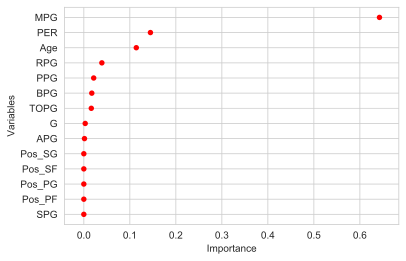

In [284]:

values = sorted(zip(x_train.columns, clf.feature_importances_), key=lambda x: x[1] * -1)
imp = pd.DataFrame(values,columns = ["Name", "Score"])
imp.sort_values(by = 'Score',inplace = True)
sns.scatterplot(x='Score',y='Name',linewidth=0,
                data=imp,s = 30, color='red').set(
    xlabel='Importance', 
    ylabel='Variables')

In [285]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
stats_salary = stats_salary.dropna()

reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),
                          n_estimators=500)
adaboost = reg.fit(x_train, y_train)

RegEvaluation(adaboost, y_test, x_test, 'Player', 'salary17_18',stats_salary)

RMSE is 4.822655894266771
R sequared is 0.6539049701449021


,Player,salary17_18,Pred_Y
6,Stephen Curry,34.682550,17.170225
15,Blake Griffin,29.512900,25.704761
1,Russell Westbrook,28.530608,22.657274
16,Mike Conley,28.530608,17.064926
0,James Harden,28.299399,22.707842
11,DeMar DeRozan,27.739975,25.080296
8,Jrue Holiday,25.686667,14.500090
23,Andre Drummond,23.775506,22.030942
21,Hassan Whiteside,23.775506,22.571520
13,Anthony Davis,23.775506,22.707842


In [286]:
ada = reg.fit(x_train_NEW, y_train_NEW)
RegEvaluation(ada, y_test_NEW, x_test_NEW, 
              'Player', 'salary17_18',stats_salary,predict=False)

RMSE is 4.333980711381591
R sequared is 0.6587869823715262


[Text(0, 0.5, 'Variables'), Text(0.5, 0, 'Importance')]

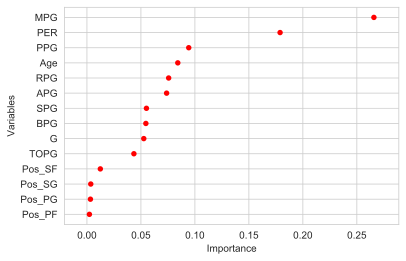

In [287]:
values = sorted(zip(x_train.columns, reg.feature_importances_), key = lambda x: x[1] * -1)
imp = pd.DataFrame(values,columns = ["Name", "Score"])
imp.sort_values(by = 'Score',inplace = True)
sns.scatterplot(x='Score',y='Name',linewidth=0,
                data=imp,s = 30, color='red').set(
    xlabel='Importance', 
    ylabel='Variables')